In [18]:
import json
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
import Hifi.recording
import Hifi.math

import importlib
importlib.reload(Hifi.recording)
importlib.reload(Hifi.math)

INPUT_RECORDING_FILENAME = 'matthew-stepping-no-turns3.json.gz'
POSE_NAMES = ['Hips', 'LeftFoot', 'RightFoot']
SUB_KEYS = {'angularVelocity': ['wx', 'wy', 'wz'],
            'rotation': ['rx', 'ry', 'rz', 'rw'],
            'translation': ['px', 'py', 'pz'],
            'velocity': ['dx', 'dy', 'dz']}
data = Hifi.recording.load(INPUT_RECORDING_FILENAME, POSE_NAMES, SUB_KEYS)

# transform Hips velocity into Hips local frame.
Hifi.recording.convert_to_relative_vector(data, 'Hips_px', 'Hips_py', 'Hips_pz', 'Hips_rx', 'Hips_ry', 'Hips_rz', 'Hips_rw',
                                          'Hips_dx', 'Hips_dy', 'Hips_dz')

# transform Hips angularVelocity into Hips local frame.
Hifi.recording.convert_to_relative_vector(data, 'Hips_px', 'Hips_py', 'Hips_pz', 'Hips_rx', 'Hips_ry', 'Hips_rz', 'Hips_rw',
                                          'LeftFoot_wx', 'LeftFoot_wy', 'LeftFoot_wz')

# transform LeftFoot position and rotation into Hips local frame.
Hifi.recording.convert_to_relative_xform(data, 'Hips_px', 'Hips_py', 'Hips_pz', 'Hips_rx', 'Hips_ry', 'Hips_rz', 'Hips_rw',
                                         'LeftFoot_px', 'LeftFoot_py', 'LeftFoot_pz', 'LeftFoot_rx', 'LeftFoot_ry', 'LeftFoot_rz', 'LeftFoot_rw')

# transform LeftFoot velocity into Hips local frame
Hifi.recording.convert_to_relative_vector(data, 'Hips_px', 'Hips_py', 'Hips_pz', 'Hips_rx', 'Hips_ry', 'Hips_rz', 'Hips_rw',
                                          'LeftFoot_dx', 'LeftFoot_dy', 'LeftFoot_dz')

# transform LeftFoot angularVelocity into Hips local frame
Hifi.recording.convert_to_relative_vector(data, 'Hips_px', 'Hips_py', 'Hips_pz', 'Hips_rx', 'Hips_ry', 'Hips_rz', 'Hips_rw',
                                          'LeftFoot_wx', 'LeftFoot_wy', 'LeftFoot_wz')

# transform RightFoot position and rotaiton to be relative to the Hips.
Hifi.recording.convert_to_relative_xform(data, 'Hips_px', 'Hips_py', 'Hips_pz', 'Hips_rx', 'Hips_ry', 'Hips_rz', 'Hips_rw',
                                         'RightFoot_px', 'RightFoot_py', 'RightFoot_pz', 'RightFoot_rx', 'RightFoot_ry', 'RightFoot_rz', 'RightFoot_rw')

# transform RightFoot velocity into Hips local frame
Hifi.recording.convert_to_relative_vector(data, 'Hips_px', 'Hips_py', 'Hips_pz', 'Hips_rx', 'Hips_ry', 'Hips_rz', 'Hips_rw',
                                          'RightFoot_dx', 'RightFoot_dy', 'RightFoot_dz')

# transform RightFoot angularVelocity into Hips local frame
Hifi.recording.convert_to_relative_vector(data, 'Hips_px', 'Hips_py', 'Hips_pz', 'Hips_rx', 'Hips_ry', 'Hips_rz', 'Hips_rw',
                                          'RightFoot_wx', 'RightFoot_wy', 'RightFoot_wz')

ROOT_MOTION = True
if ROOT_MOTION:
    # transform Hips into world space
    Hifi.recording.apply_xform(data, 1.0, 'avatar_px', 'avatar_py', 'avatar_pz',
                               'avatar_rx', 'avatar_ry', 'avatar_rz', 'avatar_rw',
                               'Hips_px', 'Hips_py', 'Hips_pz', 'Hips_rx', 'Hips_ry', 'Hips_rz', 'Hips_rw')

    # transform Hips from world into sensor space
    Hifi.recording.apply_xform_inverse(data, 'sensor_s', 'sensor_px', 'sensor_py', 'sensor_pz',
                                       'sensor_rx', 'sensor_ry', 'sensor_rz', 'sensor_rw',
                                       'Hips_px', 'Hips_py', 'Hips_pz', 'Hips_rx', 'Hips_ry', 'Hips_rz', 'Hips_rw')

    

# convert all rotations into expMaps
Hifi.recording.normalize_rotations(data, 'Hips_rx', 'Hips_ry', 'Hips_rz', 'Hips_rw')
Hifi.recording.convert_rotations_to_exp_map(data, 'Hips_rx', 'Hips_ry', 'Hips_rz', 'Hips_rw')
Hifi.recording.normalize_rotations(data, 'LeftFoot_rx', 'LeftFoot_ry', 'LeftFoot_rz', 'LeftFoot_rw')
Hifi.recording.convert_rotations_to_exp_map(data, 'LeftFoot_rx', 'LeftFoot_ry', 'LeftFoot_rz', 'LeftFoot_rw')
Hifi.recording.normalize_rotations(data, 'RightFoot_rx', 'RightFoot_ry', 'RightFoot_rz', 'RightFoot_rw')
Hifi.recording.convert_rotations_to_exp_map(data, 'RightFoot_rx', 'RightFoot_ry', 'RightFoot_rz', 'RightFoot_rw')

# prune data.
"""
data = data.drop(['Hips_px', 'Hips_py', 'Hips_pz', 'Hips_rx', 'Hips_ry', 'Hips_rz', 'Hips_rw',
                  'LeftFoot_rw', 'RightFoot_rw', 'Hips_valid', 'LeftFoot_valid', 'RightFoot_valid',
                  'avatar_px', 'avatar_py', 'avatar_pz', 'avatar_rx', 'avatar_ry', 'avatar_rz', 'avatar_rw',
                  'sensor_px', 'sensor_py', 'sensor_pz', 'sensor_rx', 'sensor_ry', 'sensor_rz', 'sensor_rw', 'sensor_s'], axis=1)
"""

data

,id,Hips_wx,Hips_wy,Hips_wz,Hips_rx,Hips_ry,Hips_rz,Hips_rw,Hips_px,Hips_py,...,avatar_rz,avatar_rw,sensor_px,sensor_py,sensor_pz,sensor_rx,sensor_ry,sensor_rz,sensor_rw,sensor_s
0,0,-0.003520,0.001182,0.006119,-0.028927,2.989072,0.023586,0.0,-1.644151,1.297424,...,0.0,-0.561770,0.686600,-11.483295,2.482953,0.0,-0.669356,0.0,0.742942,1.017823
1,1,-0.006466,-0.000533,0.005207,-0.029016,2.988884,0.023547,0.0,-1.644282,1.297400,...,0.0,-0.561770,0.686600,-11.483295,2.482953,0.0,-0.669355,0.0,0.742942,1.017824
2,2,-0.007502,0.000047,0.006865,-0.029066,2.988732,0.023553,0.0,-1.644424,1.297393,...,0.0,-0.561770,0.686600,-11.483295,2.482953,0.0,-0.669355,0.0,0.742942,1.017824
3,3,-0.008150,0.000565,0.006308,-0.029128,2.988619,0.023553,0.0,-1.644564,1.297395,...,0.0,-0.561770,0.686600,-11.483295,2.482953,0.0,-0.669355,0.0,0.742942,1.017823
4,4,-0.008551,0.001099,0.006269,-0.029180,2.988525,0.023577,0.0,-1.644700,1.297400,...,0.0,-0.561770,0.686600,-11.483295,2.482953,0.0,-0.669355,0.0,0.742942,1.017824
5,5,-0.009193,0.000764,0.005976,-0.029223,2.988458,0.023591,0.0,-1.644836,1.297404,...,0.0,-0.561770,0.686599,-11.483295,2.482954,0.0,-0.669356,0.0,0.742942,1.017823
6,6,-0.008621,0.000740,0.005869,-0.029282,2.988385,0.023627,0.0,-1.644960,1.297404,...,0.0,-0.561770,0.686599,-11.483295,2.482953,0.0,-0.669356,0.0,0.742942,1.017823
7,7,-0.008381,0.000776,0.005158,-0.029294,2.988319,0.023699,0.0,-1.645076,1.297403,...,0.0,-0.561770,0.686599,-11.483295,2.482953,0.0,-0.669356,0.0,0.742942,1.017823
8,8,-0.006970,-0.000083,0.004061,-0.029351,2.988228,0.023717,0.0,-1.645170,1.297403,...,0.0,-0.561770,0.686599,-11.483295,2.482953,0.0,-0.669356,0.0,0.742942,1.017823
9,9,-0.006124,-0.000638,0.003439,-0.029383,2.988131,0.023732,0.0,-1.645256,1.297398,...,0.0,-0.561770,0.686599,-11.483295,2.482953,0.0,-0.669356,0.0,0.742942,1.017823


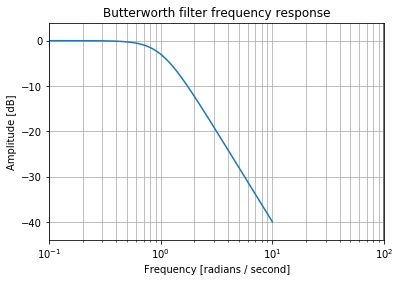

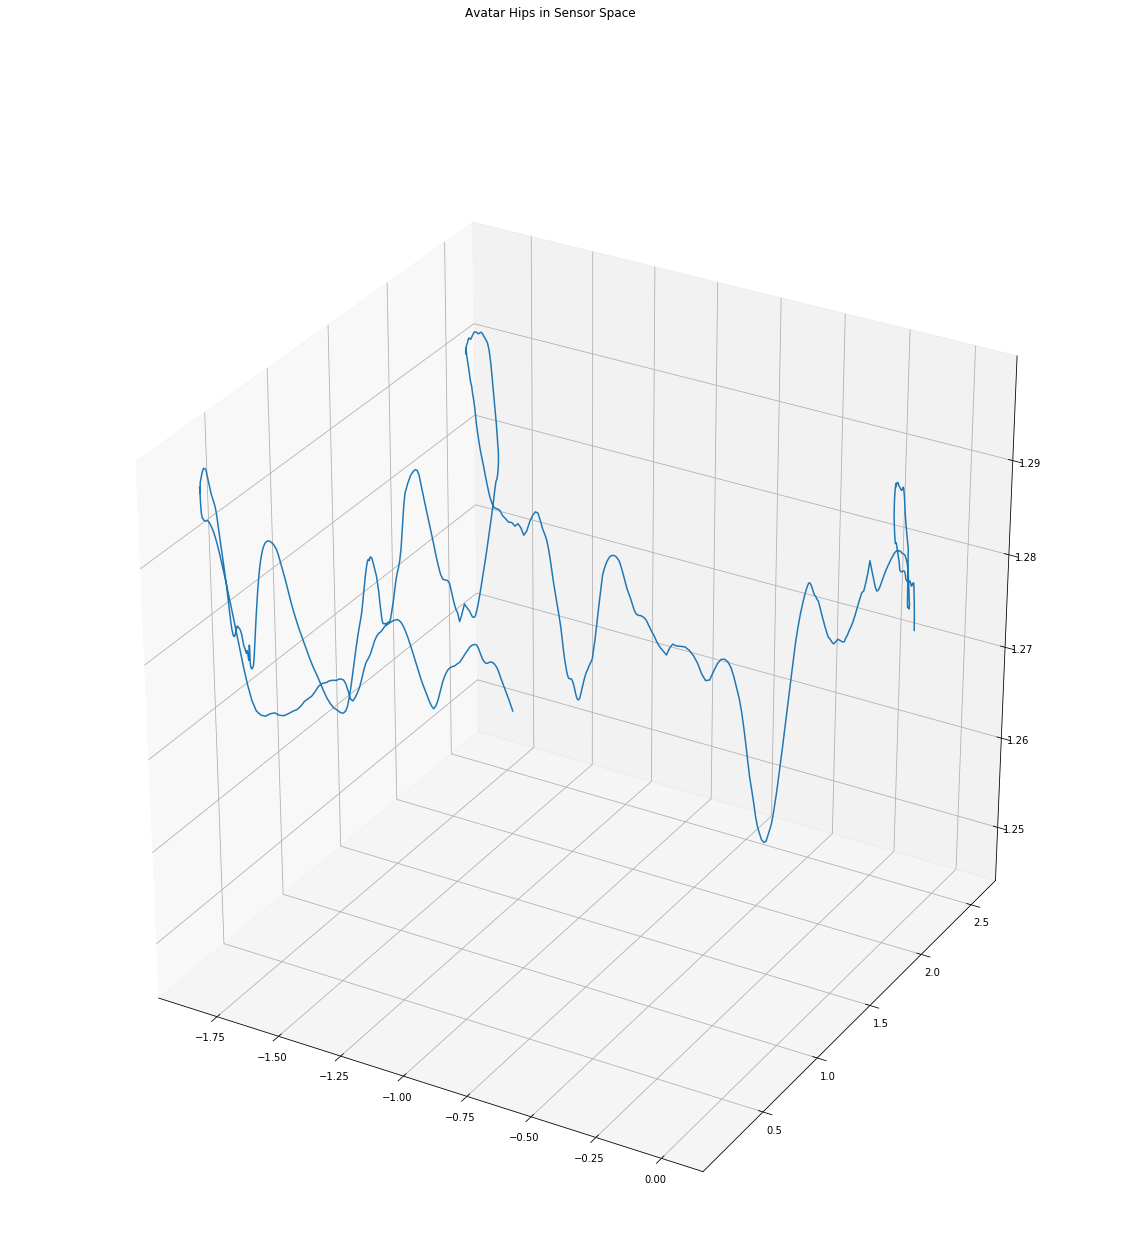

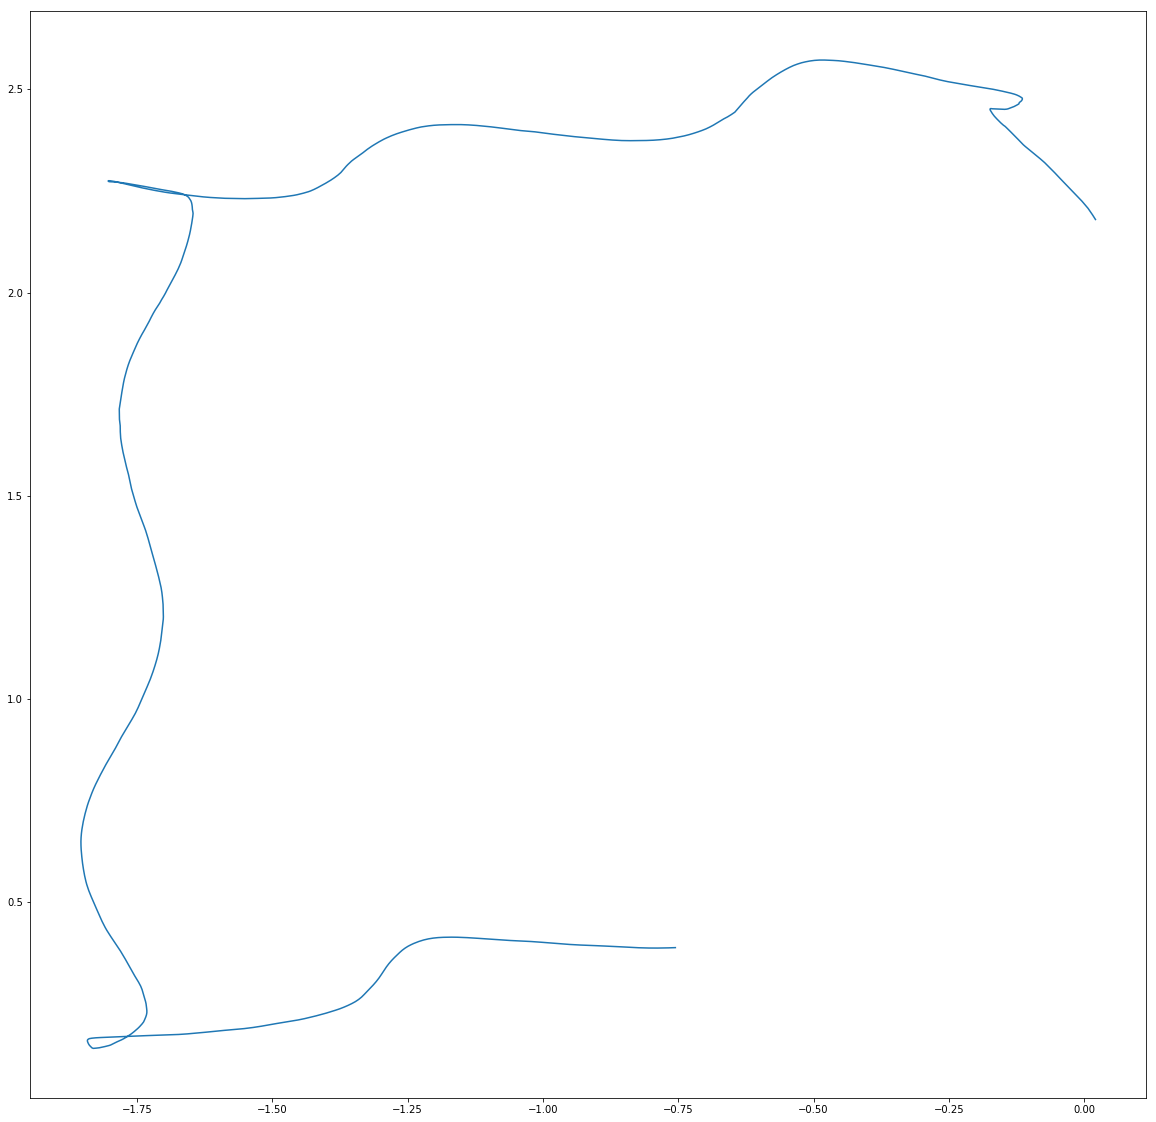

In [43]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

start = 1000
length = 1000

# filter
import numpy as np
from scipy import signal
b, a = signal.butter(2, 1, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

# draw Hips in 3d.
fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection="3d")
fig.suptitle("Avatar Hips in Sensor Space")
ax.plot(data['Hips_px'][start:start+length].values, data['Hips_pz'][start:start+length].values, data['Hips_py'][start:start+length].values)
plt.show()

fig = plt.figure(figsize=(20,20))
ax = fig.gca()
ax.plot(data['Hips_px'][start:start+length].values, data['Hips_pz'][start:start+length].values)
plt.show()


In [22]:
np.average(data["Hips_py"])

0.04427899899205654

In [5]:
def dump_data(data):
    with open('data.json', 'w') as outfile:
        json.dump(data.values.tolist(), outfile, indent = 4)

In [13]:
dump_data(data)

In [92]:
data.keys()

Index(['id', 'Hips_wx', 'Hips_wy', 'Hips_wz', 'Hips_dx', 'Hips_dy', 'Hips_dz',
       'LeftFoot_wx', 'LeftFoot_wy', 'LeftFoot_wz', 'LeftFoot_rx',
       'LeftFoot_ry', 'LeftFoot_rz', 'LeftFoot_px', 'LeftFoot_py',
       'LeftFoot_pz', 'LeftFoot_dx', 'LeftFoot_dy', 'LeftFoot_dz',
       'RightFoot_wx', 'RightFoot_wy', 'RightFoot_wz', 'RightFoot_rx',
       'RightFoot_ry', 'RightFoot_rz', 'RightFoot_px', 'RightFoot_py',
       'RightFoot_pz', 'RightFoot_dx', 'RightFoot_dy', 'RightFoot_dz'],
      dtype='object')

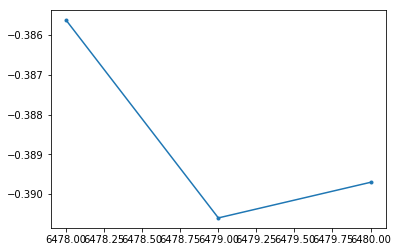

In [90]:
data['Hips_dz'][6478:6481].plot(style='.-')